In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Generiere Beispiel-Daten (zweimodaler Mix)
data = np.concatenate([
    np.random.normal(-2, 0.5, 100),
    np.random.normal(3, 1.0, 150)
])




In [4]:
data.ndim

1

In [3]:
data.shape

(250,)

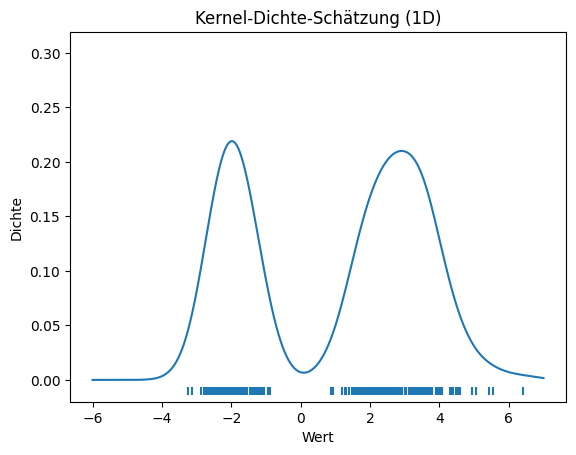

In [6]:
# KDE mit scikit-learn anpassen
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data[:, None])

# Gitterpunkte für die Dichteschätzung
x = np.linspace(-6, 7, 1000)
log_dens = kde.score_samples(x[:, None])
dens = np.exp(log_dens)

# Plot erstellen
plt.figure()
plt.plot(x, dens)
plt.scatter(data, np.zeros_like(data) - 0.01, marker='|')
plt.ylim(-0.02, dens.max() + 0.1)
plt.title('Kernel-Dichte-Schätzung (1D)')
plt.xlabel('Wert')
plt.ylabel('Dichte')
plt.show()

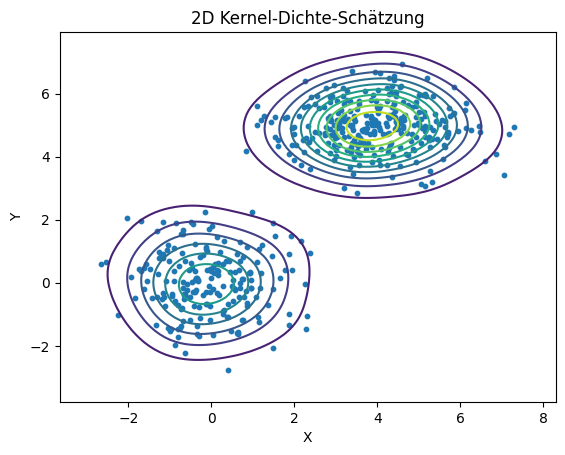

In [9]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Zufalls-Seed für Reproduzierbarkeit
np.random.seed(0)

# Generiere 2D-Beispieldaten (zweimodaler Mix)
cluster1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 200)
cluster2 = np.random.multivariate_normal([4, 5], [[1.5, 0], [0, 0.5]], 300)
data = np.vstack([cluster1, cluster2])

# KDE mit scikit-learn anpassen
kde = KernelDensity(kernel='gaussian', bandwidth=0.75)
kde.fit(data)

# Gitterpunkte für die Dichteschätzung
x = np.linspace(data[:,0].min() - 1, data[:,0].max() + 1, 100)
y = np.linspace(data[:,1].min() - 1, data[:,1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Dichte abschätzen
log_dens = kde.score_samples(grid)
Z = np.exp(log_dens).reshape(X.shape)

# Plot erstellen
plt.figure()
plt.contour(X, Y, Z, levels=10)
plt.scatter(data[:,0], data[:,1], s=10)
plt.title('2D Kernel-Dichte-Schätzung')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


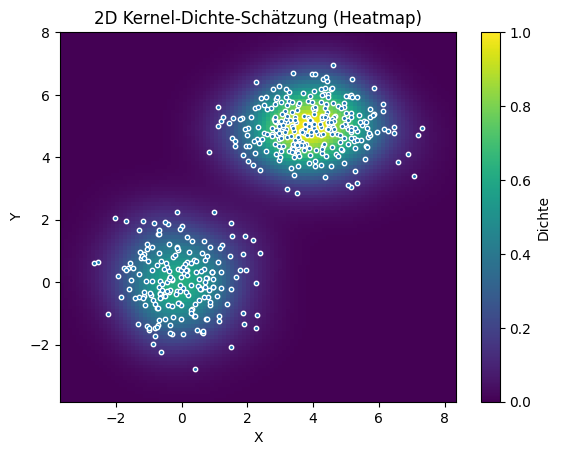

In [10]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Zufalls-Seed für Reproduzierbarkeit
np.random.seed(0)

# Generiere 2D-Beispieldaten (zweimodaler Mix)
cluster1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 200)
cluster2 = np.random.multivariate_normal([4, 5], [[1.5, 0], [0, 0.5]], 300)
data = np.vstack([cluster1, cluster2])

# KDE mit scikit-learn anpassen
kde = KernelDensity(kernel='gaussian', bandwidth=0.75)
kde.fit(data)

# Gitterpunkte für die Dichteschätzung
x = np.linspace(data[:,0].min() - 1, data[:,0].max() + 1, 100)
y = np.linspace(data[:,1].min() - 1, data[:,1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Dichte abschätzen
log_dens = kde.score_samples(grid)
Z = np.exp(log_dens).reshape(X.shape)

# Heatmap erstellen
plt.figure()
plt.pcolormesh(X, Y, Z, shading='auto')
plt.scatter(data[:,0], data[:,1], s=10, edgecolor='white')
plt.title('2D Kernel-Dichte-Schätzung (Heatmap)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Dichte')
plt.show()
